# Importing Libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor
#import Adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing svm 
from sklearn.svm import SVR
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# importing GridSearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#importing kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#metrics
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, auc
from sklearn.utils import resample
from sklearn import preprocessing

#Linear Regression
from sklearn.linear_model import LinearRegression
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
# Import zscore for scaling
from scipy.stats import zscore


# Reading Data 

We read the csv file given into a dataframe

In [2]:
data = pd.read_csv("concrete.csv")

In [3]:
print('The shape of the data is',data.shape)

The shape of the data is (1030, 9)


In [4]:
print("Let us check for any Null values in the dataset:")
data.isnull().any()

Let us check for any Null values in the dataset:


cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [5]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


# Data Set Information:

Number of instances 1030
Number of Attributes 9
Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values None

# Attribute Information:


Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength -- quantitative -- MPa -- Output Variable

# 3D Surface Plot of Data

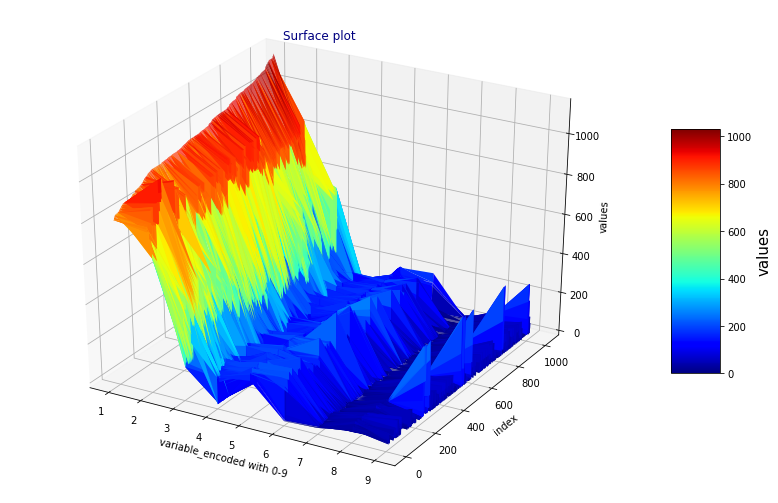

In [7]:
from mpl_toolkits.mplot3d import Axes3D
data1 = data.copy()

data1 = data1.sort_values(by=['coarseagg'],ascending=True).reset_index()

data1 = data1[['cement', 'slag', 'ash', 'water', 'superplastic',
               'coarseagg', 'fineagg', 'age', 'strength']] 

df = data1.unstack().reset_index()
df.columns = ["X","Y","Z"]


df["X"] = df["X"].map({'coarseagg':1, 'fineagg':2 , 
                       'cement':3, 'slag':6, 'ash':4,
                       'water':5, 'superplastic':7,
                        'age':9, 'strength':8})
 
fig = plt.figure(figsize=(14,9))

ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
lab.set_label("values",fontsize=15)
ax.set_xlabel("variable_encoded with 0-9")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

observation:
* As we can see the distributions of columns will not have same distribution, we need to scale the data by applying z-score so that there will be no differencs in the distributions of data

# Deliverable - 1: 

Names of Data columns

In [8]:
j = 1
for i in data.columns:
    print(j, 'column is ', i)
    j+=1

1 column is  cement
2 column is  slag
3 column is  ash
4 column is  water
5 column is  superplastic
6 column is  coarseagg
7 column is  fineagg
8 column is  age
9 column is  strength


# 1.1 Univariate analysis

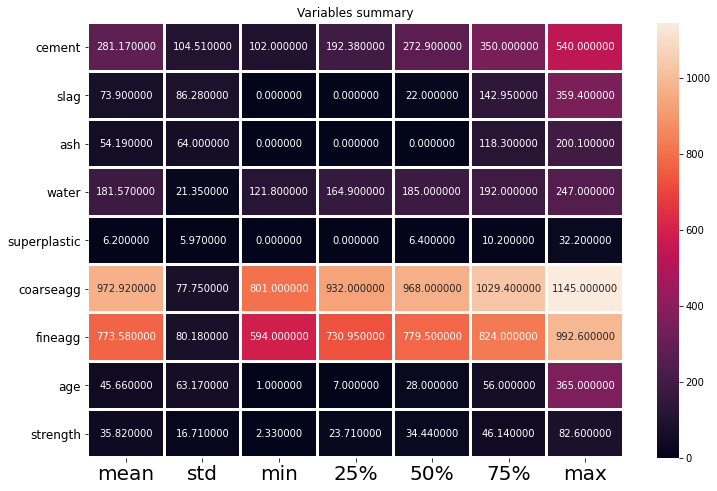

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [0]:
# the below function helps in printing five point summary of a dataframe column
def five_point_summary(i):
    print("The 5 point summary of", i, "column would give the below results: ")
    print(data[i].describe())
    print(" "*50)
    if data[i].isnull().sum()==0:
        print("There are no null values in", i, "column")
# the below function helps in printing central values of a dataframe column
def central_values(i):
    print("Range of", i, "column:",data[i].max() - data[i].min())
    print("Mean of the elements in", i, "column", data[i].mean())
    print("Median of the elements in", i, "column", data[i].median())
    print("Standard Deviation of the elements in", i, "column", data[i].std())
# the below function helps in printing percentile values in the multiploes of 10 of a dataframe column
def percentiles(i):
    print("Percentile values:")
    for j in range(10, 101, 10):
        print(j,'percentile is',np.percentile(data[i], j))
# the below function helps in plotting histogram of a dataframe column
def histogram(i):
    print('Distribution plot of', i,'column:')
    ax = sns.distplot(data[i], color="r")
    plt.tight_layout()
    plt.ylabel('value')
    plt.show()
    print('Histogram plot of', i,'column:')
    plt.hist(data[i], color ='r')
    plt.xlabel(i)
    plt.ylabel('value')
    plt.show()
    
# the below function helps in plotting violinplot of a dataframe column
def boxplot(i):
    print("Box plot of cement column:")
    ax = sns.boxplot(x=i,data=data, orient ='v', color ='r')
    plt.tight_layout()
    plt.show()
from scipy import stats
# the below function describes about outlier count
def outliers(i):
    # IQR=Q3-Q1
    #lower 1.5*IQR whisker i.e Q1-1.5*IQR
    #upper 1.5*IQR whisker i.e Q3+1.5*IQR
    print("Outlier Counts maually with the help of code:")
    print(""*50)
    Q1=data[i].quantile(q=0.25)
    Q3=data[i].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(data[i]))
    lower_outlier_limit=Q1-1.5*(Q3-Q1)
    upper_outliers_limit=Q3+1.5*(Q3-Q1)
    print('Lower outlier limit in', i,': ', lower_outlier_limit)
    print('Upper outlier limit in', i,': ', upper_outliers_limit)
    print(""*50)
    print('Number of outliers in', i, 'upper : ', data[data[i]>upper_outliers_limit][i].count())
    print('Number of outliers in', i, 'lower : ', data[data[i]<lower_outlier_limit][i].count())
    print(""*50)
    print('% of Outlier in', i, 'upper: ',(data[data[i]>upper_outliers_limit][i].count()*100/len(data)), '%')
    print('% of Outlier in',i, 'lower: ',(data[data[i]<lower_outlier_limit][i].count()*100/len(data)), '%')
    

# Cement

In [11]:
five_point_summary('cement')

The 5 point summary of cement column would give the below results: 
count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64
                                                  
There are no null values in cement column


In [12]:
central_values('cement')

Range of cement column: 438.0
Mean of the elements in cement column 281.1678640776698
Median of the elements in cement column 272.9
Standard Deviation of the elements in cement column 104.50636449481536


In [13]:
percentiles('cement')

Percentile values:
10 percentile is 153.54999999999998
20 percentile is 173.8
30 percentile is 212.38
40 percentile is 238.0
50 percentile is 272.9
60 percentile is 302.0
70 percentile is 332.5
80 percentile is 376.0
90 percentile is 425.0
100 percentile is 540.0


Distribution plot of cement column:


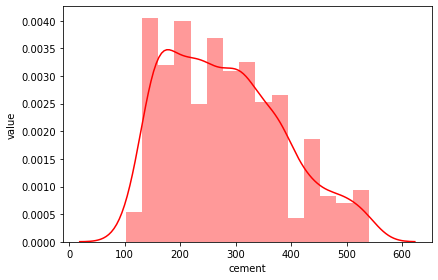

Histogram plot of cement column:


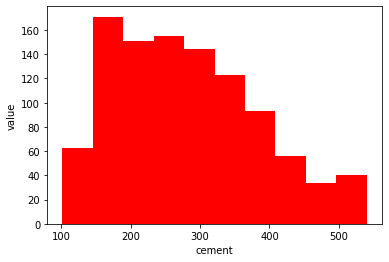

In [14]:
histogram('cement')

Box plot of cement column:


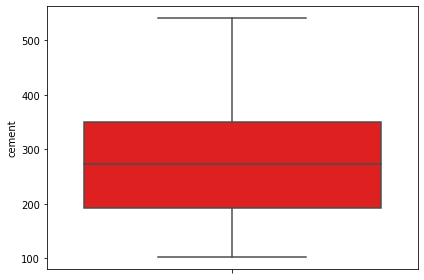

In [15]:
boxplot('cement')

Observation:
* There seems no outliers in the boxplot of cement column

Let us check with some code manually

In [16]:
outliers('cement')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625
Lower outlier limit in cement :  -44.0625
Upper outlier limit in cement :  586.4375

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0

% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


# Slag

In [17]:
five_point_summary('slag')

The 5 point summary of slag column would give the below results: 
count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64
                                                  
There are no null values in slag column


In [18]:
central_values('slag')

Range of slag column: 359.4
Mean of the elements in slag column 73.89582524271844
Median of the elements in slag column 22.0
Standard Deviation of the elements in slag column 86.2793417481054


In [19]:
percentiles('slag')

Percentile values:
10 percentile is 0.0
20 percentile is 0.0
30 percentile is 0.0
40 percentile is 0.0
50 percentile is 22.0
60 percentile is 97.1
70 percentile is 128.5
80 percentile is 163.18000000000004
90 percentile is 192.0
100 percentile is 359.4


Distribution plot of slag column:


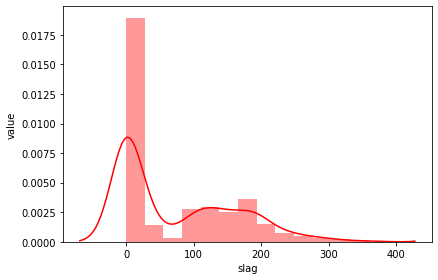

Histogram plot of slag column:


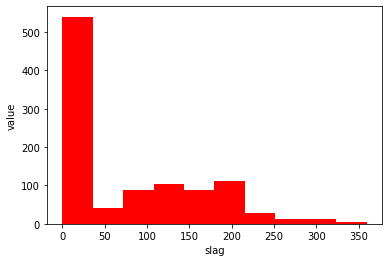

In [20]:
histogram('slag')

Box plot of cement column:


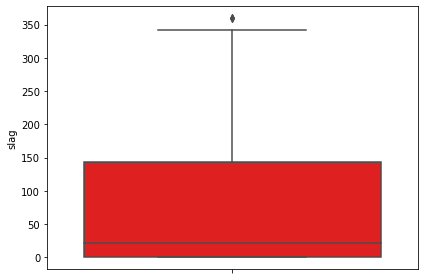

In [21]:
boxplot('slag')

Observation:
* There are outliers in the boxplot of cement column

Let us check with some code manually

In [22]:
outliers('slag')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95
Lower outlier limit in slag :  -214.42499999999998
Upper outlier limit in slag :  357.375

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0

% of Outlier in slag upper:  0.1941747572815534 %
% of Outlier in slag lower:  0.0 %


# Ash

In [23]:
five_point_summary('ash')

The 5 point summary of ash column would give the below results: 
count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64
                                                  
There are no null values in ash column


In [24]:
central_values('ash')

Range of ash column: 200.1
Mean of the elements in ash column 54.188349514563086
Median of the elements in ash column 0.0
Standard Deviation of the elements in ash column 63.99700415268794


In [25]:
percentiles('ash')

Percentile values:
10 percentile is 0.0
20 percentile is 0.0
30 percentile is 0.0
40 percentile is 0.0
50 percentile is 0.0
60 percentile is 89.75999999999999
70 percentile is 100.5
80 percentile is 123.0
90 percentile is 141.06
100 percentile is 200.1


Distribution plot of ash column:


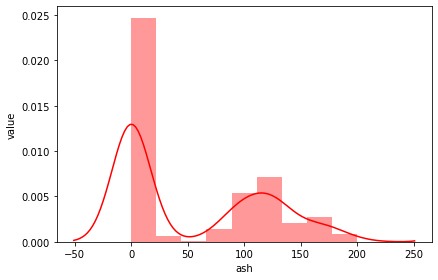

Histogram plot of ash column:


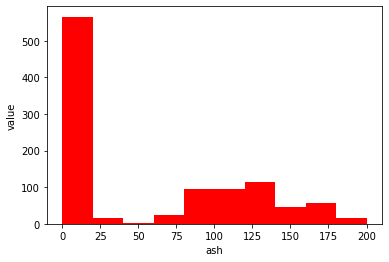

In [26]:
histogram('ash')

Box plot of cement column:


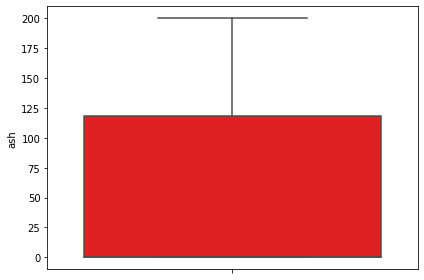

In [27]:
boxplot('ash')

Observation:
* There seems no outliers in the boxplot of cement column

Let us check with some code manually

In [28]:
outliers('ash')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3
Lower outlier limit in ash :  -177.45
Upper outlier limit in ash :  295.75

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0

% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


# Water

In [29]:
five_point_summary('water')

The 5 point summary of water column would give the below results: 
count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64
                                                  
There are no null values in water column


In [30]:
central_values('water')

Range of water column: 125.2
Mean of the elements in water column 181.56728155339798
Median of the elements in water column 185.0
Standard Deviation of the elements in water column 21.35421856503245


In [31]:
percentiles('water')

Percentile values:
10 percentile is 154.6
20 percentile is 162.0
30 percentile is 170.0
40 percentile is 178.0
50 percentile is 185.0
60 percentile is 188.5
70 percentile is 192.0
80 percentile is 195.5
90 percentile is 203.5
100 percentile is 247.0


Distribution plot of water column:


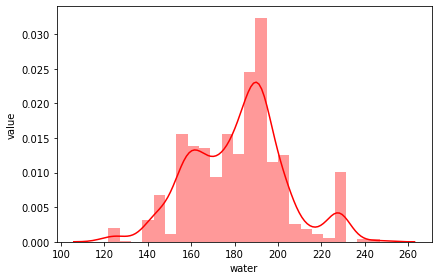

Histogram plot of water column:


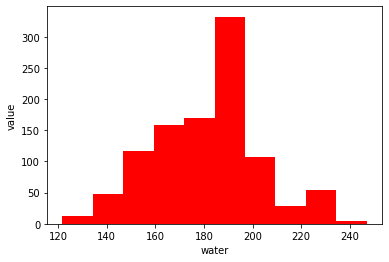

In [32]:
histogram('water')

Box plot of cement column:


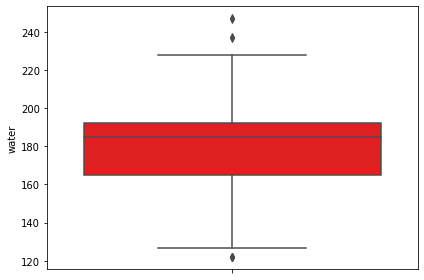

In [33]:
boxplot('water')

Observation:
* There are outliers in the boxplot of cement column both below and top of inner quartile range

Let us check with some code manually

In [34]:
outliers('water')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994
Lower outlier limit in water :  124.25000000000001
Upper outlier limit in water :  232.64999999999998

Number of outliers in water upper :  4
Number of outliers in water lower :  5

% of Outlier in water upper:  0.3883495145631068 %
% of Outlier in water lower:  0.4854368932038835 %


# Superplastic

In [35]:
five_point_summary('superplastic')

The 5 point summary of superplastic column would give the below results: 
count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64
                                                  
There are no null values in superplastic column


In [36]:
central_values('superplastic')

Range of superplastic column: 32.2
Mean of the elements in superplastic column 6.204660194174756
Median of the elements in superplastic column 6.4
Standard Deviation of the elements in superplastic column 5.973841392485508


In [37]:
percentiles('superplastic')

Percentile values:
10 percentile is 0.0
20 percentile is 0.0
30 percentile is 0.0
40 percentile is 4.060000000000002
50 percentile is 6.4
60 percentile is 8.0
70 percentile is 9.6
80 percentile is 11.1
90 percentile is 12.21
100 percentile is 32.2


Distribution plot of superplastic column:


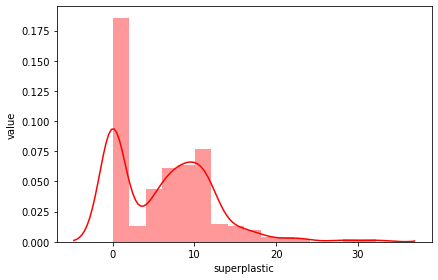

Histogram plot of superplastic column:


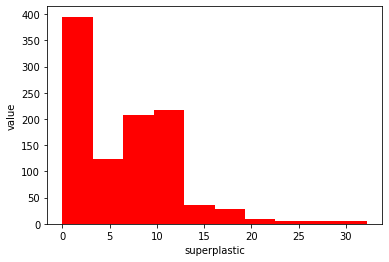

In [38]:
histogram('superplastic')

Box plot of cement column:


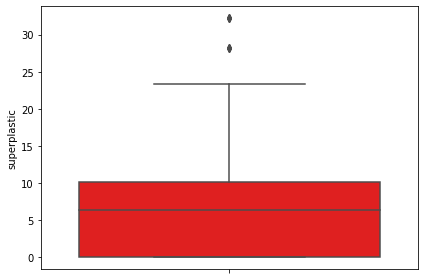

In [39]:
boxplot('superplastic')

Observation:
* There are some outliers in the boxplot of superplastic column above the inner quartile range

Let us check with some code manually

In [40]:
outliers('superplastic')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2
Lower outlier limit in superplastic :  -15.299999999999999
Upper outlier limit in superplastic :  25.5

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0

% of Outlier in superplastic upper:  0.970873786407767 %
% of Outlier in superplastic lower:  0.0 %


# Coarseagg

In [41]:
five_point_summary('coarseagg')

The 5 point summary of coarseagg column would give the below results: 
count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64
                                                  
There are no null values in coarseagg column


In [42]:
central_values('coarseagg')

Range of coarseagg column: 344.0
Mean of the elements in coarseagg column 972.918932038835
Median of the elements in coarseagg column 968.0
Standard Deviation of the elements in coarseagg column 77.75395396672087


In [43]:
percentiles('coarseagg')

Percentile values:
10 percentile is 852.1
20 percentile is 913.98
30 percentile is 936.0
40 percentile is 947.0
50 percentile is 968.0
60 percentile is 991.52
70 percentile is 1012.0
80 percentile is 1047.0
90 percentile is 1076.45
100 percentile is 1145.0


Distribution plot of coarseagg column:


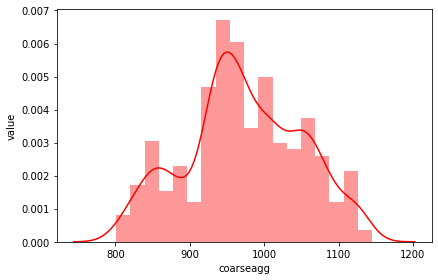

Histogram plot of coarseagg column:


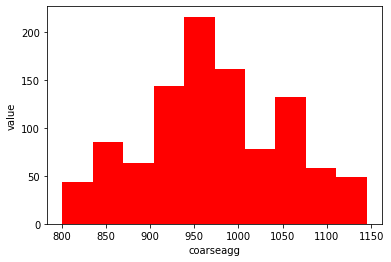

In [44]:
histogram('coarseagg')

Box plot of cement column:


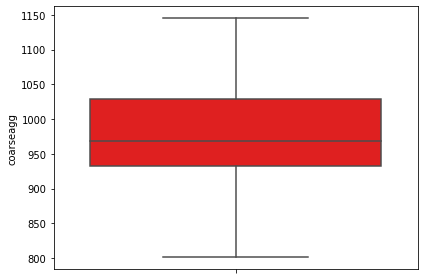

In [45]:
boxplot('coarseagg')

Observation:
* There seems no outliers in the boxplot of cement column

Let us check with some code manually

In [46]:
outliers('coarseagg')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009
Lower outlier limit in coarseagg :  785.8999999999999
Upper outlier limit in coarseagg :  1175.5000000000002

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0

% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


# Fineagg

In [55]:
five_point_summary('fineagg')

The 5 point summary of fineagg column would give the below results: 
count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64
                                                  
There are no null values in fineagg column


In [50]:
central_values('fineagg')

Range of fineagg column: 398.6
Mean of the elements in fineagg column 773.5804854368932
Median of the elements in fineagg column 779.5
Standard Deviation of the elements in fineagg column 80.17598014240443


In [54]:
percentiles('fineagg')

Percentile values:
10 percentile is 664.0699999999999
20 percentile is 709.94
30 percentile is 746.8
40 percentile is 758.84
50 percentile is 779.5
60 percentile is 794.08
70 percentile is 806.9
80 percentile is 845.0
90 percentile is 880.7600000000001
100 percentile is 992.6


Distribution plot of fineagg column:


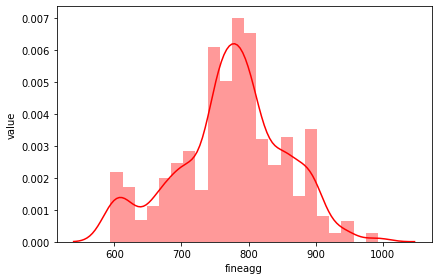

Histogram plot of fineagg column:


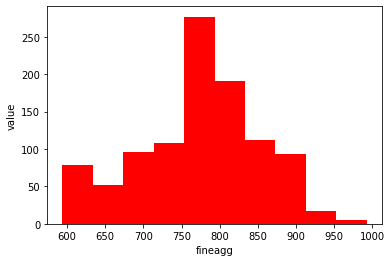

In [53]:
histogram('fineagg')

Box plot of cement column:


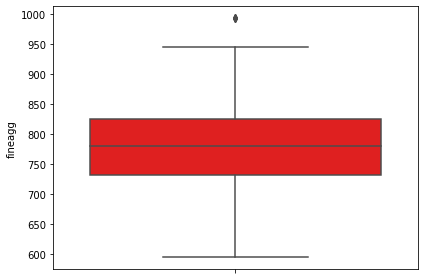

In [49]:
boxplot('fineagg')

Observation:
* There are outliers in the boxplot of cement column above the inner quartile range

Let us check with some code manually

In [58]:
outliers('fineagg')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007
Lower outlier limit in fineagg :  591.3749999999998
Upper outlier limit in fineagg :  963.575

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0

% of Outlier in fineagg upper:  0.4854368932038835 %
% of Outlier in fineagg lower:  0.0 %


# Age

In [47]:
five_point_summary('age')

The 5 point summary of age column would give the below results: 
count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64
                                                  
There are no null values in age column


In [59]:
central_values('age')

Range of age column: 364
Mean of the elements in age column 45.662135922330094
Median of the elements in age column 28.0
Standard Deviation of the elements in age column 63.16991158103279


In [60]:
percentiles('age')

Percentile values:
10 percentile is 3.0
20 percentile is 7.0
30 percentile is 14.0
40 percentile is 28.0
50 percentile is 28.0
60 percentile is 28.0
70 percentile is 28.0
80 percentile is 56.0
90 percentile is 100.0
100 percentile is 365.0


Distribution plot of age column:


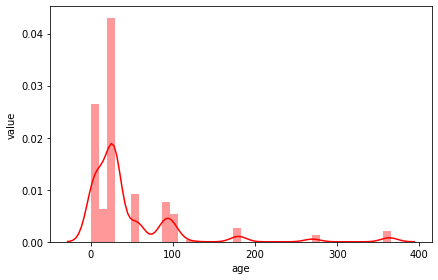

Histogram plot of age column:


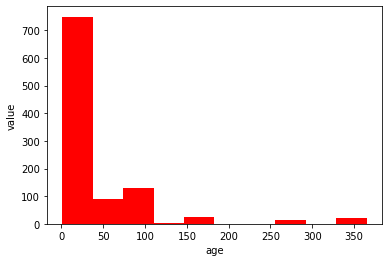

In [61]:
histogram('age')

Box plot of cement column:


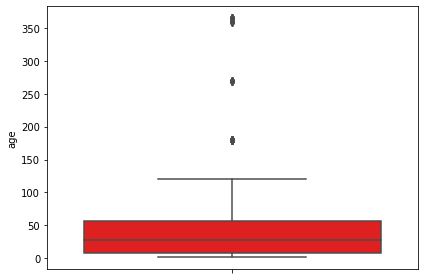

In [51]:
boxplot('age')

Observation:
* There are outliers in the boxplot of cement column above the inner quartile range

Let us check with some code manually

In [57]:
outliers('age')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0
Lower outlier limit in age :  -66.5
Upper outlier limit in age :  129.5

Number of outliers in age upper :  59
Number of outliers in age lower :  0

% of Outlier in age upper:  5.728155339805825 %
% of Outlier in age lower:  0.0 %


# Strength

In [62]:
five_point_summary('strength')

The 5 point summary of strength column would give the below results: 
count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64
                                                  
There are no null values in strength column


In [52]:
central_values('strength')

Range of strength column: 80.27
Mean of the elements in strength column 35.81796116504854
Median of the elements in strength column 34.445
Standard Deviation of the elements in strength column 16.70574196191251


In [56]:
percentiles('strength')

Percentile values:
10 percentile is 14.2
20 percentile is 20.96
30 percentile is 25.474
40 percentile is 30.928
50 percentile is 34.445
60 percentile is 39.019999999999996
70 percentile is 43.288999999999994
80 percentile is 50.513999999999996
90 percentile is 58.82
100 percentile is 82.6


In [0]:
histogram('strength')

In [0]:
boxplot('strength')

Observation:
* There are outliers in the boxplot of cement column above the inner quartile range

Let us check with some code manually

In [48]:
outliers('strength')

Outlier Counts maually with the help of code:

1st Quartile (Q1) is:  23.709999999999997
3st Quartile (Q3) is:  46.135000000000005
Interquartile range (IQR) is  22.425000000000008
Lower outlier limit in strength :  -9.927500000000013
Upper outlier limit in strength :  79.77250000000001

Number of outliers in strength upper :  4
Number of outliers in strength lower :  0

% of Outlier in strength upper:  0.3883495145631068 %
% of Outlier in strength lower:  0.0 %


# 1.2 Multivariate Analysis

# Visualizing KDE

In [0]:
# plotting the kernel density estimation of the features and the result (compressive strength) 
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_title('Kernel density estimation of the data')
sns.kdeplot(data.iloc[:, 0], ax=ax1)
sns.kdeplot(data.iloc[:, 1], ax=ax1)
sns.kdeplot(data.iloc[:, 2], ax=ax1)
sns.kdeplot(data.iloc[:, 3], ax=ax1)
sns.kdeplot(data.iloc[:, 4], ax=ax1)
sns.kdeplot(data.iloc[:, 5], ax=ax1)
sns.kdeplot(data.iloc[:, 6], ax=ax1)
sns.kdeplot(data.iloc[:, 7], ax=ax1)
# shading the area below compressive strength (result)
sns.kdeplot(data.iloc[:, 8], ax=ax1, shade=True)

# Visualizing Countor Plots

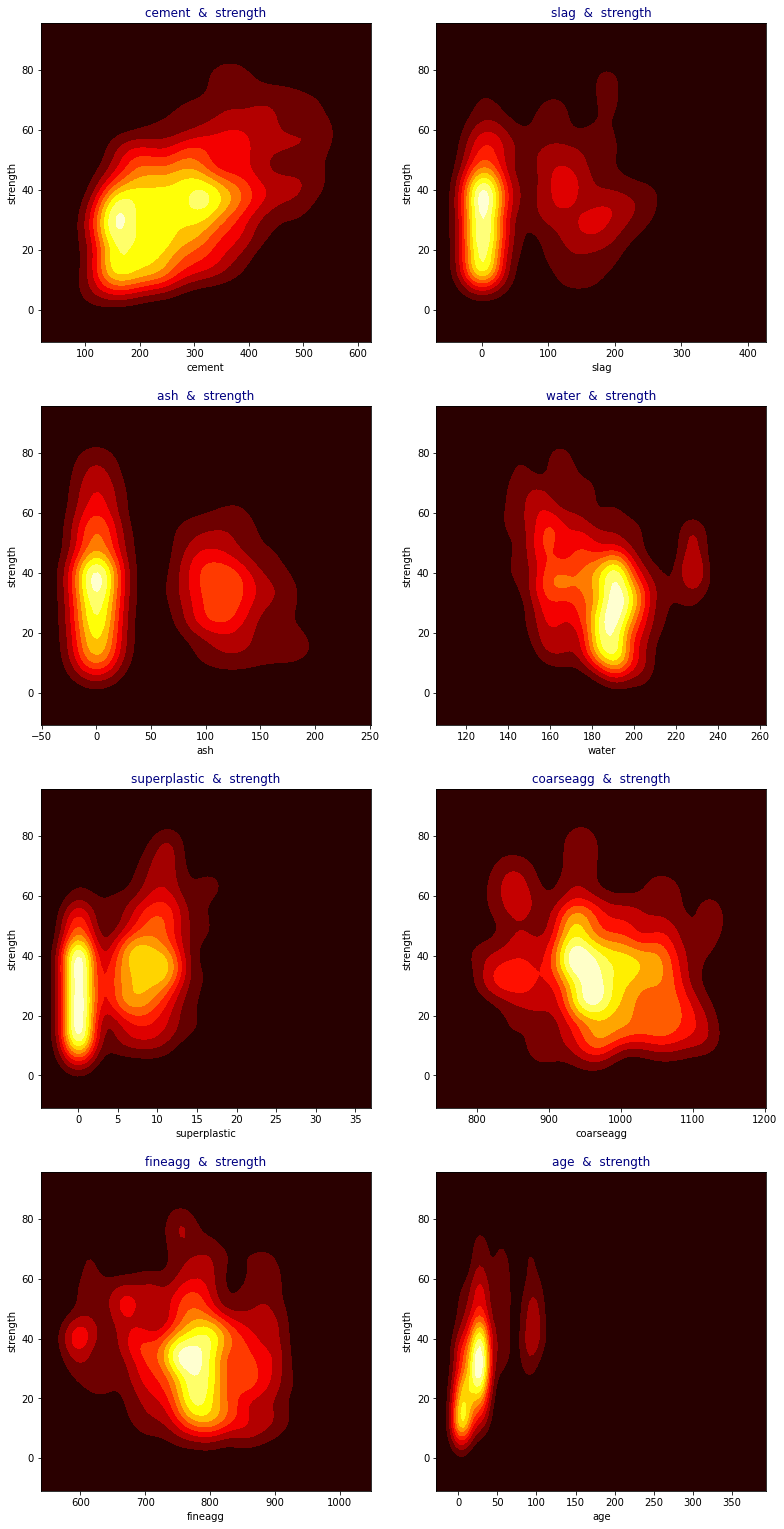

In [63]:
cols = [i for i in data.columns if i not in 'strength']
length = len(cols)
#import itertools
import itertools
plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(data[i],
                data["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  strength",color="navy")

In [0]:
sns.pairplot(data)


#### strength attribute : Relationship between dependent and independent attributes
strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- strength vs slag: There is no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor because of lot of clusters.
- strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strengthas they are randomly scattered.

In [0]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(data.corr(), vmax=.6, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.4)
plt.title('Correlation heatmap')
plt.show()

#### Observation for non diagnol elements:
* Water and superplastic have the highest negative corelation
* there is a very less negative correlation between (strength, water); (fineagg,water); (ash cement); (slag,courseagg); (slag,finagg)
* There is a very less positive corelation between (strength, superplastic); (strength, age); (superplastic, ash); (water, age)



# Scatter plots 

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=data, ax=ax, sizes=(50, 300))
ax.set_title("Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Observations from Strength vs (Cement, Age, Water):
* strength increases with amount of cement
* strength increases with age
* Cement with low age requires more cement for higher strength
* The older the cement is the more water it requires
* strength increases when less water is used in preparing it

In [0]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
data.plot.scatter(0, 8, s=15, c='b', grid=True, ax=ax[0, 0])
data.plot.scatter(1, 8, s=15, c='b', grid=True, ax=ax[0, 1])
data.plot.scatter(2, 8, s=15, c='b', grid=True, ax=ax[1, 0])
data.plot.scatter(3, 8, s=15, c='b', grid=True, ax=ax[1, 1])
data.plot.scatter(4, 8, s=15, c='b', grid=True, ax=ax[2, 0])
data.plot.scatter(5, 8, s=15, c='b', grid=True, ax=ax[2, 1])
data.plot.scatter(6, 8, s=15, c='b', grid=True, ax=ax[3, 0])
data.plot.scatter(7, 8, s=15, c='b', grid=True, ax=ax[3, 1])
plt.tight_layout()

Observation:
* There seems clustering in age column that is age has more than 1 cluster of data

# Joint Plots of Weekly corelated data

In [0]:
sns.jointplot('slag', 'superplastic', data, kind='reg', size=5, color='r')

In [0]:
for i in ['age', 'water','superplastic']:
    sns.jointplot(i, 'slag', data, kind='reg', size=5, color='r')

# Joint Plot of Moderately corelated data:

In [0]:
sns.jointplot('age', 'strength', data, kind='reg', size=7, color='r')

In [0]:
sns.jointplot('slag', 'strength', data, kind='reg', size=7, color='r')

In [0]:
for i in ['ash','fineagg','strength','water']:
    sns.jointplot(i, 'superplastic', data, kind='reg', size=7, color='r')

Observations:
* By seeing scatter plots and corelation matrix, we can say that there is no strong relation between the variable ie.., having a corelaion>0.8

# 1.c Handling Outliers and Missing Values

# Missing Values:

In [0]:
#Checking for missing values
data.isnull().sum()

Observation:
* As we can see there are no missing values

# Handling Outliers

In [0]:
# Counting the number of outliers
print("Count of outliers in columns of data before handling outliers")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

In [0]:
fig = plt.figure(figsize = (15, 10))
ax = sns.boxplot(data = data.iloc[:, 0:8], orient = 'h')

In [0]:
for i in data.columns[:-1]:
    if i!= 'age' or i!='fineagg':
        Q1=data[i].quantile(q=0.25)
        Q3=data[i].quantile(q=0.75)
        lower_outlier_limit=Q1-1.5*(Q3-Q1)
        upper_outliers_limit=Q3+1.5*(Q3-Q1)
        median = data[i].median()
        data.loc[(data[i] < lower_outlier_limit) | (data[i] > upper_outliers_limit), i] = data[i].median()

In [0]:
# A quick check to find columns after handling outliers
fig = plt.figure(figsize = (15, 10))
ax = sns.boxplot(data = data.iloc[:, 0:8], orient = 'h')

# Deliverable 2

# 2a) Trying Different Features 

# log and 1/log of data

In [0]:
#converting column to log(data)
data_feature_copy = pd.DataFrame()
datas=data.copy()
for i in datas.columns:
    if i!='strength':
        data_feature_copy['log of '+i] = np.log1p(datas[i])
        data_feature_copy['1/log of '+i] = 1/np.log1p(datas[i])
    if i == 'strength':
        data_feature_copy[i]=datas[i]

In [0]:
plt.figure(figsize=(18,18))
ax = sns.heatmap(data_feature_copy.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=None, linecolor='white', annot=True)
plt.title('Correlation heatmap of logged data')
plt.show()

Observation: 
* Instead of age columns, we can use log(age) for machine learning algorithms

Observation:
* By applying log(data), there seemed an increase in corelation between some pairs such as (strength, age); (ash, superplastic) but thats not significant increase
* There is an inverse relation between log and 1/log of data

# Trying Composite features:

In [0]:
data_comp = data.copy()
data_com = pd.DataFrame()
data_com['superplastic/water']=data_comp['superplastic']/data_comp['water']
data_com['cement/ash']=data_comp['cement']/data_comp['ash']
data_com['cement*age/ash']=(data_comp['cement']*data_comp['age'])/data_comp['ash']
data_com['cement*superplastic/ash']=(data_comp['cement']*data_comp['superplastic'])/data_comp['ash']
data_com['cement/age*ash'] = data_comp['cement']/(data['age']*data['ash'])
data_com['cement*age']=data_comp['cement']*data_comp['age']
data_com['cement/age']=data_comp['cement']/data_comp['age']
data_com['1/age']=1/data_comp['age']
data_com['1/log(age)']=1/np.log1p(data_comp['age'])
data_com['3/log(age)']=3/np.log1p(data_comp['age'])
data_com['slag*age']=data_comp['slag']/data_comp['age']
data_com['superplastic/4']=data_comp['superplastic']/5
data_com['sqrt(superplastic)']=np.sqrt(data_comp['superplastic'])
data_com['water/cement']=data_comp['water']/data_comp['cement']
data_com['strength']=data_comp['strength']
plt.figure(figsize=(18,18))
ax = sns.heatmap(data_com.corr(), linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.title('Correlation heatmap')
plt.show()

Observation:
* As we can see, the new features which we added has less correation less than 0.55 with strength; So better not use these composite features for a small increase in correlation

# 2b) Complexity of Model

# OLS with constant

In [0]:
data_ols = data.copy()

In [66]:
import statsmodels.api as sm
X=data_ols.iloc[:,:8]
Y=data_ols.iloc[:,8]
ls=sm.OLS(Y,sm.add_constant(X))
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):          6.29e-206
Time:                        10:09:50   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement           0.1198      0.008     14.113      0.000       0.103       0.136
slag             0.1039      0.010     10.247      0.000       0.084       0.124
ash              0.0879      0.013      6.988      0.000       0.063       0.113
water           -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplastic     0.2922      0.093      3.128      0.002       0.109       0.476
coarseagg        0.0181      0.009      1.926      0.054      -0.000       0.037
fineagg          0.0202      0.011      1.887      0.059      -0.001       0.041
age              0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation:
* Here we can see that the constant term is having P value greater than 0.05 viz. the assumed level of significance, thus we remove the constant term from modelling

# OLS without constant

In [67]:
ls=sm.OLS(Y,X)
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               strength   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1732.
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                        0.00
Time:                        10:09:56   Log-Likelihood:                         -3869.4
No. Observations:                1030   AIC:                                      7755.
Df Residuals:                    1022   BIC:                                      7794.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cement           0.1134      0.004     26.692      0.000       0.105       0.122
slag             0.0962      0.005     18.488      0.000       0.086       0.106
ash              0.0793      0.008     10.077      0.000       0.064       0.095
water           -0.1822      0.016    -11.345      0.000      -0.214      -0.151
superplastic     0.2647      0.088      3.008      0.003       0.092       0.437
coarseagg        0.0103      0.003      3.364      0.001       0.004       0.016
fineagg          0.0113      0.004      3.188      0.001       0.004       0.018
age              0.1140      0.005     21.031      0.000       0.103       0.125
==============================================================================
Omnibus:                        5.325   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.269
Skew:                          -0.175   Prob(JB):                       0.0717
Kurtosis:                       3.031   Cond. No.                         354.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression

In [0]:
data_lr = data.copy()
X=data_lr.iloc[:,:8]
Y=data_lr.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [69]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Score: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lrtr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lrte))
print('Train RMSE : ',rmse_train)
print('Test RMSE : ',rmse_test)

Score:  0.6278843231627503
Train R2 score:  0.6278843231627503
Test R2 score:  0.573673894353407
Train RMSE :  0.6100128497312574
Test RMSE :  0.6529365249751257


# Polynomial Features degree 2

In [0]:
data_pol = data.copy()
X=data_pol.iloc[:,:8]
Y=data_pol.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [71]:
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lr2tr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lr2te))
print('Train RMSE - degree 2 polynomial: ',rmse_train)
print('Test RMSE - degree 2 polynomial: ',rmse_test)

Training R2 - degree 2 polynomial:  0.8267455408520525
Test R2 - degree 2 polynomial:  0.7523056169509423
Train RMSE - degree 2 polynomial:  0.4162384642821317
Test RMSE - degree 2 polynomial:  0.4976890425246045


Observation:
* Quadratic features are a good fit

# Polynomial Features degree 3

In [0]:
data_polt = data.copy()
X=data_polt.iloc[:,:8]
Y=data_polt.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [73]:
pf_3 = PolynomialFeatures(degree = 3)
X_polytr = pf_3.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr3tr = lr.predict(X_polytr)
print("Training R2 - degree 3 polynomial: ",r2_score(y_train, y_pred_lr3tr))
X_polyte = pf_3.fit_transform(X_test)
y_pred_lr3te= lr.predict(X_polyte)
print("Test R2 - degree 3 polynomial: ",r2_score(y_test,y_pred_lr3te))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lr3tr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lr3te))
print('Train RMSE - degree 3 polynomial: ',rmse_train)
print('Test RMSE- degree 3 polynomial : ',rmse_test)

Training R2 - degree 3 polynomial:  0.9326560129902682
Test R2 - degree 3 polynomial:  0.7923395523447632
Train RMSE - degree 3 polynomial:  0.25950720030421465
Test RMSE- degree 3 polynomial :  0.45569775910710464


Observation:
* Model is tending to overfit with 3 polynomial features

# Polynomial Features degree 4

In [0]:
data_polf = data.copy()
X=data_polf.iloc[:,:8]
Y=data_polf.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [75]:
pf_4 = PolynomialFeatures(degree = 4)
X_polytr = pf_4.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr4tr = lr.predict(X_polytr)
print("Training R2 - degree 4 polynomial: ",r2_score(y_train, y_pred_lr4tr))
X_polyte = pf_4.fit_transform(X_test)
y_pred_lr4te= lr.predict(X_polyte)
print("Test R2 - degree 4 polynomial: ",r2_score(y_test,y_pred_lr4te))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lr4tr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lr4te))
print('Train RMSE - degree 4 polynomial : ',rmse_train)
print('Test RMSE - degree 4 polynomial: ',rmse_test)

Training R2 - degree 4 polynomial:  0.9815200986439135
Test R2 - degree 4 polynomial:  -12474.604375623896
Train RMSE - degree 4 polynomial :  0.13594080092483818
Test RMSE - degree 4 polynomial:  111.69424504254414


Observation:
* Model will be a bad fit from 4 or more polynomial features

# 2c) Exploring Guassians

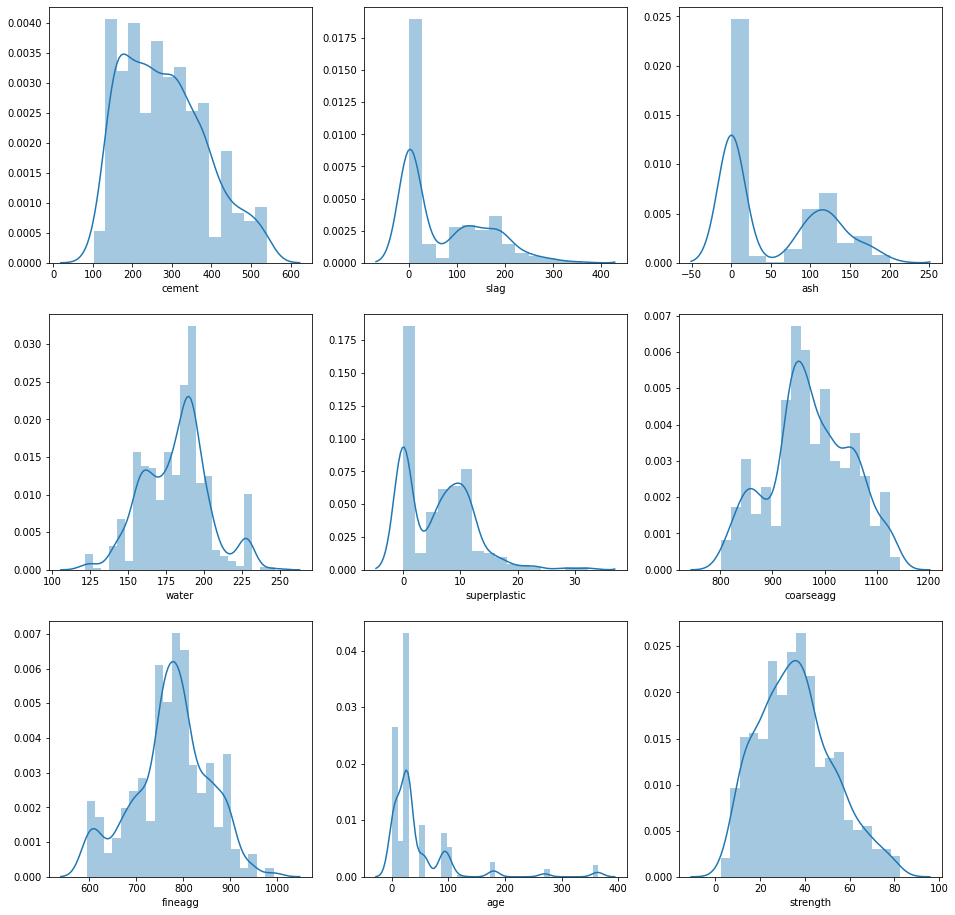

In [76]:

# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(data['cement'],ax=ax2[0][0])
sns.distplot(data['slag'],ax=ax2[0][1])
sns.distplot(data['ash'],ax=ax2[0][2])
sns.distplot(data['water'],ax=ax2[1][0])
sns.distplot(data['superplastic'],ax=ax2[1][1])
sns.distplot(data['coarseagg'],ax=ax2[1][2])
sns.distplot(data['fineagg'],ax=ax2[2][0])
sns.distplot(data['age'],ax=ax2[2][1])
sns.distplot(data['strength'],ax=ax2[2][2])

Observtions for diagnol elements:
* cement attribute have almost normal curve.
* slag has  two gausssians and rightly skewed which indicates the outliers in the upper side of IQR. 
* ash has two gaussians and rightly skewed which indicates the outliers in the upper side of IQR.
* water has outliers on both left and right side and this can be visuaized in the above boxplot.
* superplastic has multiple gaussians and rightly skewed which indicates the outliers in the upper side of IQR.
* coarseagg has three guassians and almost normal.
* fineagg has two guassians and looks like normal.
* age has multiple guassians and rightly skewed which indicates the outliers in the upper side of IQR.
* strength is almost as a normal curve.

# Deliverable 3: Feature Importance

In [77]:
#import random forest
from sklearn.ensemble import RandomForestRegressor
# Divide the dataset into Input features and Target variables
a = data.drop('strength', axis=1)
b = data['strength']
rf = RandomForestRegressor().fit(a, b)
f_p = rf.feature_importances_
res = list(zip(a.columns, f_p*100))
for i in res:
    print(i)

('cement', 31.698007727261373)
('slag', 8.255124374567055)
('ash', 1.5066182262465164)
('water', 10.149588138400006)
('superplastic', 7.775721583427679)
('coarseagg', 2.8134993582146794)
('fineagg', 3.612948655632422)
('age', 34.18849193625027)


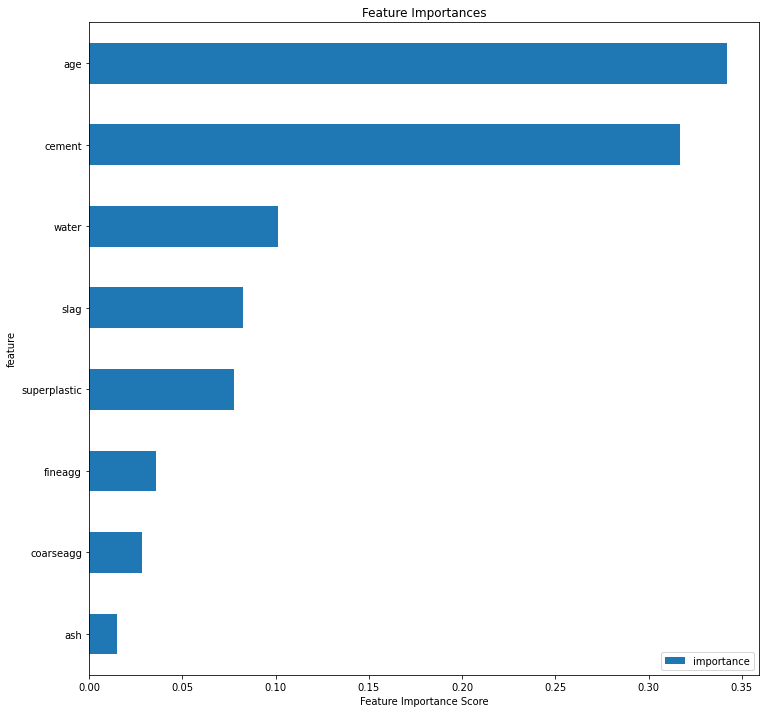

In [78]:
feat_imp = pd.DataFrame({'importance':f_p})    
feat_imp['feature'] = a.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:8]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importances", figsize=(12,12))
plt.xlabel('Feature Importance Score')
plt.show()

# Deliverable 4: Machine Learning Models

In [0]:
#We convert age column to age(column) because it has more corelation with strength variable
#Instead of adding log(age) to the dataframe, we have logged the existing column to reduse noise
data['age'] = np.log1p(data['age'])

In [0]:
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [0]:
data_model = data.copy()
X=data_model.drop(['strength'], axis = 1)
Y=data_model['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [82]:
data_model.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.367296,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.708050,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.367296,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.367296,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.367296,18.29


# 4.1 Decesion Tree Regressor

In [83]:
dt_model = DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 30],
              }
grid_cv_dtm = GridSearchCV(dt_model, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)
print("Best Score::{}".format(grid_cv_dtm.best_score_))
# View best hyperparameters
print(grid_cv_dtm.best_params_)

print('Best criterion:', grid_cv_dtm.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_cv_dtm.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:', grid_cv_dtm.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min_samples_leaf:', grid_cv_dtm.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split:', grid_cv_dtm.best_estimator_.get_params()['min_samples_split'])
best_criterion=grid_cv_dtm.best_estimator_.get_params()['criterion']
best_max_depth=grid_cv_dtm.best_estimator_.get_params()['max_depth']
best_max_leaf_nodes=grid_cv_dtm.best_estimator_.get_params()['max_leaf_nodes']
best_min_samples_leaf=grid_cv_dtm.best_estimator_.get_params()['min_samples_leaf']
best_min_samples_split=grid_cv_dtm.best_estimator_.get_params()['min_samples_split']
print("Best Score:", grid_cv_dtm.best_score_)

Best Score::0.719057753548012
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}
Best criterion: mse
Best max_depth: 8
Best max_leaf_nodes: 20
Best min_samples_leaf: 20
Best min_samples_split: 10
Best Score: 0.719057753548012


In [84]:
dt_best = DecisionTreeRegressor(criterion = best_criterion, max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split)
dt_best.fit(X_train,y_train)
#predict y_test by passing X_test into model
y_pred = dt_best.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_best.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_best.score(X_test,y_test))
#Evaluate the model using accuracy
acc_dt=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_dt)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7887558429833079
Performance on testing data using DT: 0.6958209585410985
Accuracy DT:  0.6958209585410985
MSE:  0.3041790414589015


Observation:
* Decesion Tree regressor is tending towards overfitting
* Mean Squared error is less and equal to 0.30

In [0]:
#plot y_test and y_pred using pearsonr function and jointplot

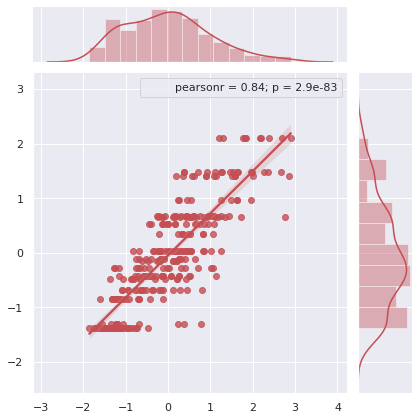

In [86]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");

Observation:
* Since the dt regressor tend to overfit, the predicted values scattered a lot instead of lying on the line

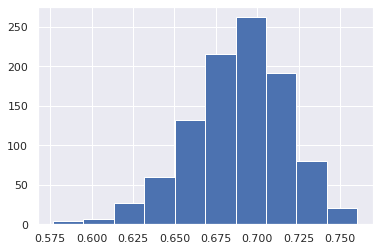

95.0 confidence interval 62.5% and 74.1%


In [87]:
values = data.values
# Number of bootstrap samples to create
n_iterations = 1000      
# size of a bootstrap sample
n_size = int(len(data) * 0.7)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    model =  DecisionTreeRegressor(criterion = best_criterion, max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split)
    # fit against independent variables and corresponding target values
    model.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = model.score(test[:, :-1] , y_test)
    predictions = model.predict(test[:, :-1])  

    stats.append(score)
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [88]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'R2 accuracy': [acc_dt]},index={'1'})
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821


Observation:
* The model clearly overfits as we can see that there is a significant difference between train and test data. So, lets prune the decesion tree

Feature importances: 
                    Imp
cement        0.454900
slag          0.099004
ash           0.000000
water         0.106165
superplastic  0.000000
coarseagg     0.000000
fineagg       0.000000
age           0.339931


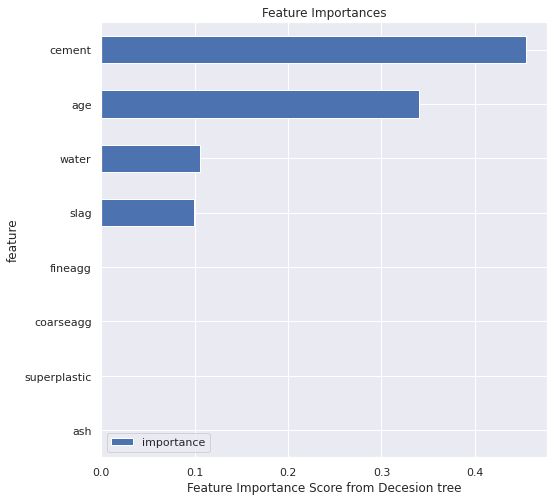

In [89]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_best.feature_importances_,columns=['Imp'],index=X.columns))


feat_imp = pd.DataFrame({'importance':dt_best.feature_importances_})    
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:9]
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importances", figsize=(8,8))
plt.xlabel('Feature Importance Score from Decesion tree')
plt.show()

# 4.2 Decesion Tree Regressor - K fold Cross Validation

In [0]:
data_kf = data.copy()
X=data_kf.drop(['strength'], axis = 1)
Y=data_kf['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [0]:
# we run kfold cross validation with the default parameters 

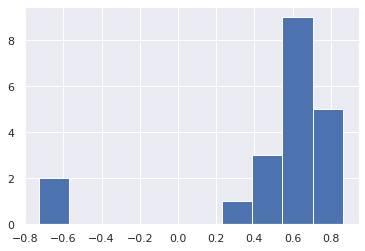

95.0 confidence interval of test accuracy between 31.6% and 71.0%
                                                  
max accuracy: 0.865662095313511
min accuracy: -0.7279238421104371
Average accuracy:  0.6427997745042601
Standard Deviation:  0.4100525246802927


In [92]:
num_folds = 20
seed = 42
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X_test, y_test, cv=kfold)
# plot scores
from matplotlib import pyplot
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy between %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))
print(" "*50)
print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [0]:
# we run kfold cross validation with the best parameters 

[ 0.80362512 -0.8564058   0.51164694  0.86417431  0.57631664  0.24714379
  0.48398373  0.49462217  0.85313738  0.41911497  0.87655843  0.6940557
  0.70457025  0.56610199  0.67792272  0.19811129  0.5067204   0.73716119
 -0.12027051  0.72972491]


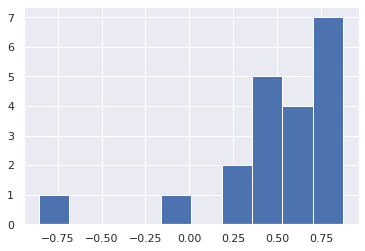

95.0 confidence interval 30.9% and 68.8%
max accuracy: 0.8765584281519738
min accuracy: -0.8564058011765968
Average accuracy:  0.5960684114668873
Standard Deviation:  0.394226579911317


In [94]:
dt_best = DecisionTreeRegressor(criterion = best_criterion, max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split)
dt_best.fit(X_train,y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'R2 accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068


Observation:
* The k fold - Decesion Tree with the best parameters from gridsearch performs less good, but in one of the fold we get a maximum ccuracy of 0.876

# 4.3 Decesion tree best model with top 4 features

In [96]:
#independent and dependent variable
da = data.copy()
X = da.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = da['strength']
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train =zscore(y_train)
y_test = zscore(y_test)
dt_best = DecisionTreeRegressor(criterion = best_criterion, max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split)
dt_best.fit(X_train,y_train)
#predict y_test by passing X_test into model
y_pred = dt_best.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_best.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_best.score(X_test,y_test))
#Evaluate the model using accuracy
acc_dt=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_dt)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7887558429833079
Performance on testing data using DT: 0.6958209585410985
Accuracy DT:  0.6958209585410985
MSE:  0.3041790414589015


Observation:
* This model also tend to overfit even though top 4 features are used

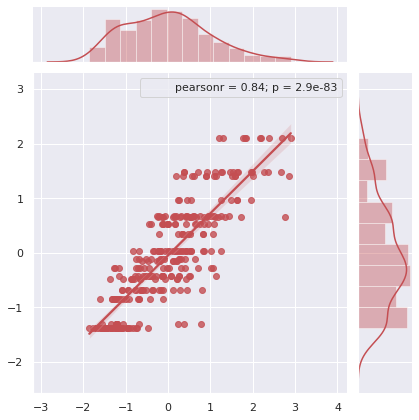

In [97]:
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");

Observation:
* Since the dt regressor tend to overfit, the predicted values scattered a lot instead of lying on the line

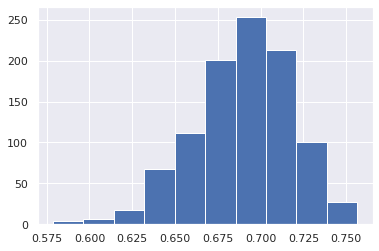

95.0 confidence interval 63.0% and 73.9%


In [98]:
values = da.values
# Number of bootstrap samples to create
n_iterations = 1000      
# size of a bootstrap sample
n_size = int(len(da) * 0.7)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    model =  DecisionTreeRegressor(criterion = best_criterion, max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split)
    # fit against independent variables and corresponding target values
    model.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = model.score(test[:, :-1] , y_test)
    predictions = model.predict(test[:, :-1])  

    stats.append(score)
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [99]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree with top 4 features'], 'R2 accuracy': [acc_dt]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821


Observation:
* Top 4 features helped in increasing the mean accuracy 

# 4.4 Decesion tree k fold model with top 5 features

In [0]:
#independent and dependent variable
dat = data.copy()
X = dat.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = dat['strength']
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [0]:
# we run kfold cross validation with the default parameters 

[0.51831425 0.78485484 0.82164008 0.39958718 0.82354832 0.7718007
 0.60955756 0.77449858 0.54298851 0.66008053]


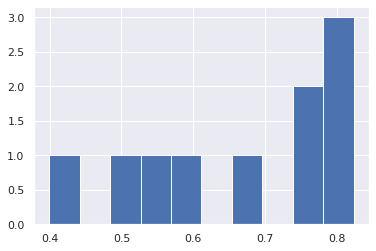

95.0 confidence interval of test accuracy 56.5% and 77.7%
max accuracy: 0.8235483169628715
min accuracy: 0.39958718480045785
Average accuracy:  0.6706870555490457
Standard Deviation:  0.14037710403791182


In [102]:
num_folds = 10
seed = 42
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


[0.55537961 0.66039786 0.6206465  0.43466778 0.56919246 0.64273542
 0.57025829 0.53382147 0.52112349 0.36564201]


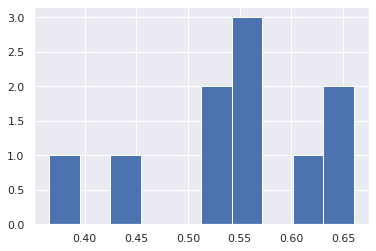

95.0 confidence interval 48.2% and 61.3%
max accuracy: 0.6603978597733939
min accuracy: 0.36564201048784084
Average accuracy:  0.5473864887993029
Standard Deviation:  0.0865464286240728


In [103]:
dt_best = DecisionTreeRegressor(criterion = best_criterion, max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split)
dt_best.fit(X_train,y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_best,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [104]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree top 4 - k fold'], 'R2 accuracy': [accuracy]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386


Observation:
* Decesion tree along with kfold is giving less mean accuracy

# 4.5 Regularizing/pruning the Decesion tree - All Features 

In [0]:
data_mode = data.copy()
X=data_mode.drop(['strength'], axis = 1)
Y=data_mode['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [106]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor(max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'R2 accuracy': [acc_RDT]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

Performance on training data using DT: 0.7286342678873312
Performance on testing data using DT: 0.6397028737352166
Accuracy DT:  0.6397028737352166
MSE:  0.36029712626478344


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703


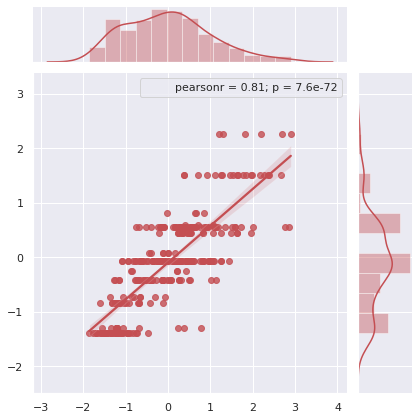

In [107]:
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");

Observation:
* Since the dt regressor tend to overfit, the predicted values scattered a lot instead of lying on the line

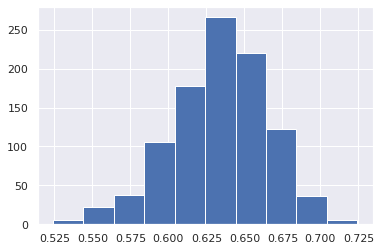

95.0 confidence interval 56.2% and 69.0%


In [108]:
values = data_mode.values
# Number of bootstrap samples to create
n_iterations = 1000      
# size of a bootstrap sample
n_size = int(len(data_mode) * 0.7)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    model =  DecisionTreeRegressor(max_depth = 4,random_state=1,min_samples_leaf=5)
    # fit against independent variables and corresponding target values
    model.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = model.score(test[:, :-1] , y_test)
    predictions = model.predict(test[:, :-1])  

    stats.append(score)
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Feature importances: 
                    Imp
cement        0.458275
slag          0.127801
ash           0.000000
water         0.058036
superplastic  0.005039
coarseagg     0.000000
fineagg       0.000000
age           0.350849


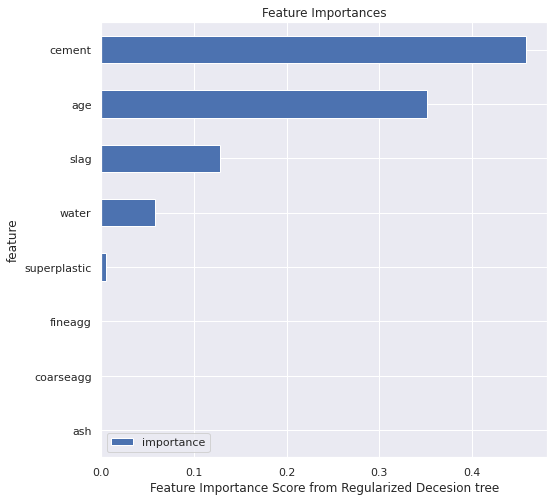

In [109]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=X.columns))
feat_imp = pd.DataFrame({'importance':reg_dt_model.feature_importances_})    
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:8]
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importances", figsize=(8,8))
plt.xlabel('Feature Importance Score from Regularized Decesion tree')
plt.show()

# Visualizing the Pruned Decesion Tree

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
colu=data
xvar = colu.drop('strength', axis=1)
feature_cols = xvar.columns

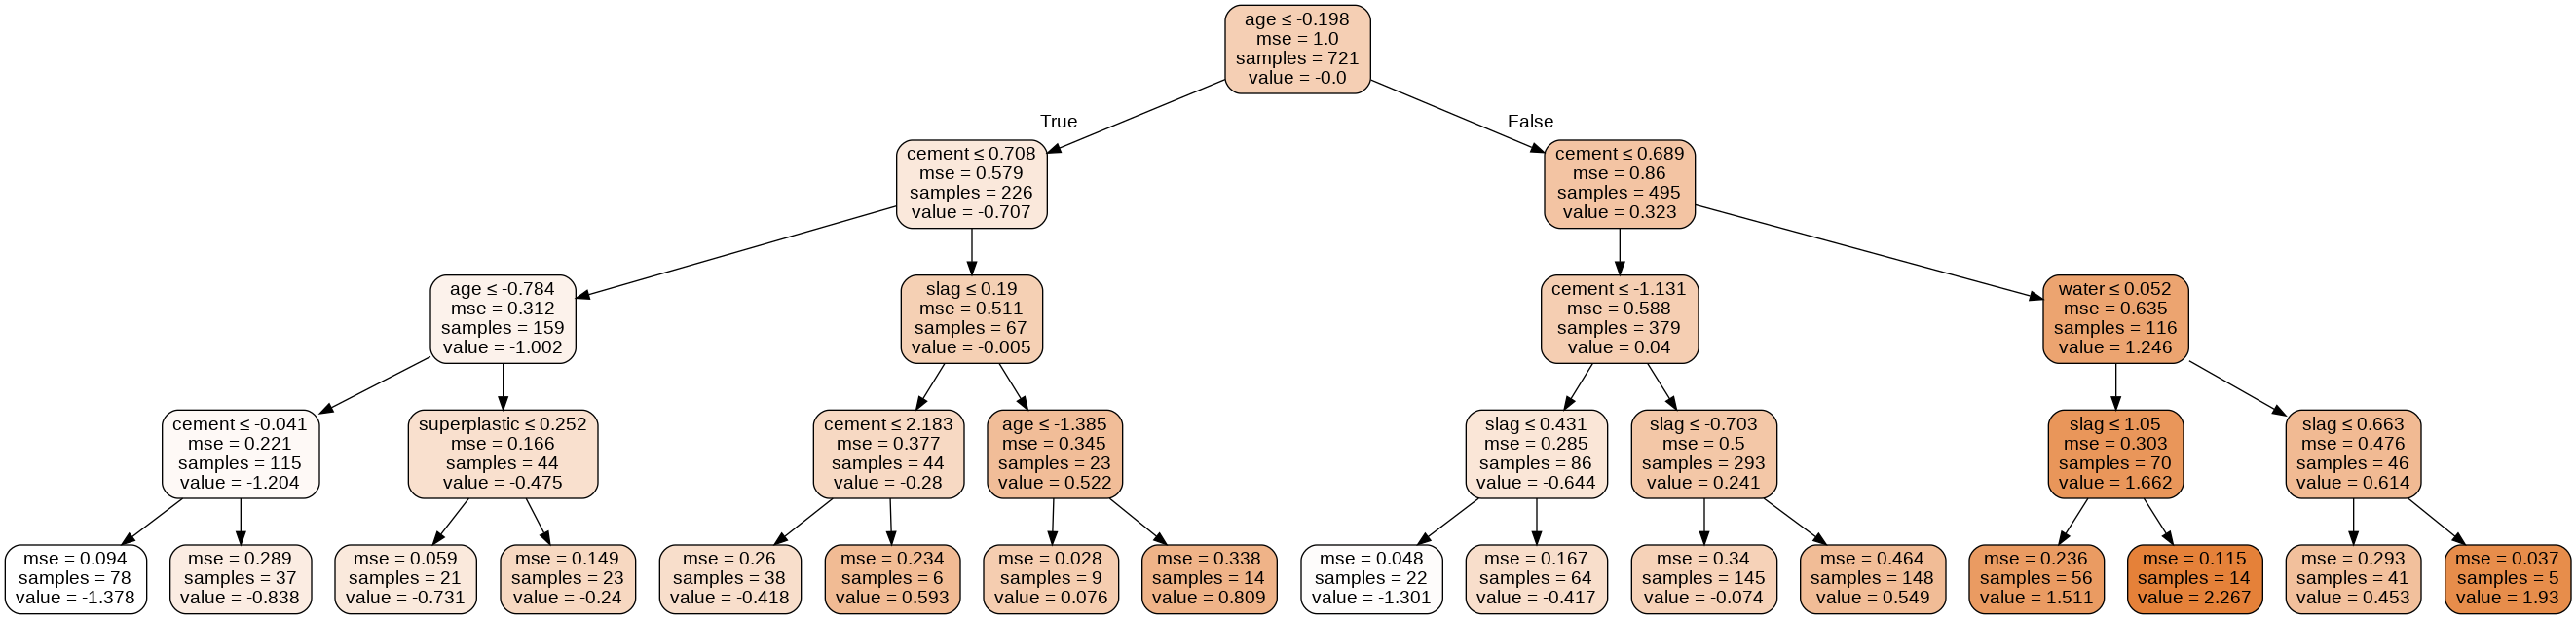

In [111]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

# 4.6 K fold - Pruned Decesion Tree

In [0]:
data_mode = data.copy()
X=data_mode.drop(['strength'], axis = 1)
Y=data_mode['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [0]:
# we run kfold cross validation with the default parameters 

[0.46646746 0.70533518 0.64689374 0.4674343  0.65243951 0.73300459
 0.59327288 0.6126792  0.40980263 0.48430551]


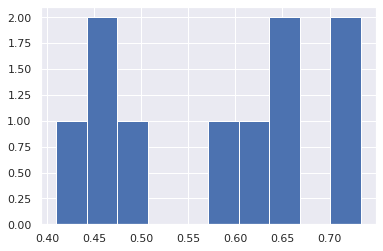

95.0 confidence interval of test accuracy 49.7% and 65.8%
max accuracy: 0.7330045901484132
min accuracy: 0.4098026282546382
Average accuracy:  0.5771634986875783
Standard Deviation:  0.10662573036162137


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163


In [114]:
num_folds = 10
seed = 42
dt_model_k = DecisionTreeRegressor(max_depth = 4,random_state=1,min_samples_leaf=5)
dt_model_k.fit(X_train, y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model_k,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'R2 accuracy': [accuracy]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

# 4.7 Pruned Decesion tree best model with top 5 features

In [115]:
#independent and dependent variable
da = data.copy()
X = da.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = da['strength']
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)
dt_best = DecisionTreeRegressor(max_depth = 4,random_state=1,min_samples_leaf=5)
dt_best.fit(X_train,y_train)
#predict y_test by passing X_test into model
y_pred = dt_best.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_best.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_best.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7286342678873312
Performance on testing data using DT: 0.6397028737352166
Accuracy DT:  0.6397028737352166
MSE:  0.36029712626478344


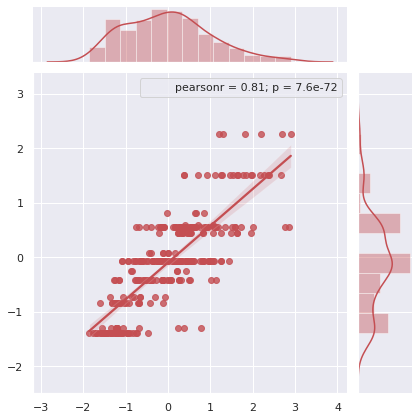

In [116]:
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");

Observation:
* Since the dt regressor tend to overfit, the predicted values scattered a lot instead of lying on the line

In [117]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree with top 5 features'], 'R2 accuracy': [acc_RDT]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703


# 4.8 Pruned Decision Tree with top 5 features and k fold

[0.46646746 0.68355869 0.67440405 0.44940616 0.65243951 0.73300459
 0.66407956 0.63250311 0.40980263 0.48430551]


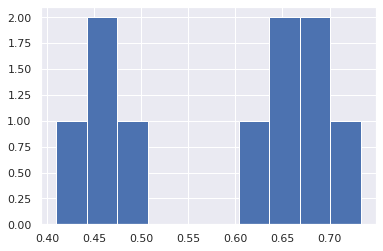

95.0 confidence interval of test accuracy 50.0% and 67.0%
max accuracy: 0.7330045901484132
min accuracy: 0.4098026282546382
Average accuracy:  0.5849971266789253
Standard Deviation:  0.11222282266379278


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997


In [118]:
num_folds = 10
seed = 42
dt_model_k = DecisionTreeRegressor(max_depth = 4,random_state=1,min_samples_leaf=5)
dt_model_k.fit(X_train, y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model_k,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold and top 5 features'], 'R2 accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

# 4.9 Random Forest Regressor

In [0]:
data_rf = data.copy()
X=data_rf.drop(['strength'], axis = 1)
Y=data_rf['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [120]:
#import random forest
from sklearn.ensemble import RandomForestRegressor
# Divide the dataset into Input features and Target variables
data_model = data.copy()
X=data_model.drop(['strength'], axis = 1)
Y=data_model['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor().fit(X_train,y_train)
grid_cv_rf = RandomizedSearchCV(rf, param_grid, cv=3)
grid_cv_rf.fit(X_train,y_train)
print("Best Score::{}".format(grid_cv_rf.best_score_))
# View best hyperparameters
print(grid_cv_rf.best_params_)

print('Best n_estimators:', grid_cv_rf.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', grid_cv_rf.best_estimator_.get_params()['max_features'])
print('Best max_depth:', grid_cv_rf.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', grid_cv_rf.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split:', grid_cv_rf.best_estimator_.get_params()['min_samples_split'])
print('Best bootstrap:', grid_cv_rf.best_estimator_.get_params()['bootstrap'])
best_n_estimators=grid_cv_rf.best_estimator_.get_params()['n_estimators']
best_max_features=grid_cv_rf.best_estimator_.get_params()['max_features']
best_max_depth=grid_cv_rf.best_estimator_.get_params()['max_depth']
best_min_samples_leaf=grid_cv_rf.best_estimator_.get_params()['min_samples_leaf']
best_min_samples_split=grid_cv_rf.best_estimator_.get_params()['min_samples_split']
best_bootstrap=grid_cv_rf.best_estimator_.get_params()['bootstrap']
print("Best Score:", grid_cv_rf.best_score_)

Best Score::0.7380931589084908
{'min_samples_split': 40, 'min_samples_leaf': 20, 'max_leaf_nodes': 30, 'max_depth': 6, 'criterion': 'mae'}
Best n_estimators: 100
Best max_features: auto
Best max_depth: 6
Best min_samples_leaf: 20
Best min_samples_split: 40
Best bootstrap: True
Best Score: 0.7380931589084908


In [121]:
rf_best = RandomForestRegressor(n_estimators = best_n_estimators, max_features = best_max_features, max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split, bootstrap=best_bootstrap)
rf_best.fit(X_train,y_train)
#predict y_test by passing X_test into model
y_pred = rf_best.predict(X_test)
# performance on train data
print('Performance on training data using DT:',rf_best.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',rf_best.score(X_test,y_test))
#Evaluate the model using accuracy
acc_rf=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_dt)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))



#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'R2 accuracy': [acc_rf]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

Performance on training data using DT: 0.8318913679502679
Performance on testing data using DT: 0.7739340583370271
Accuracy DT:  0.6958209585410985
MSE:  0.22606594166297284


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934


Observation:
* Random Forest regressor is also almost a overfit model because there is a slight difference of around 6 between train and test

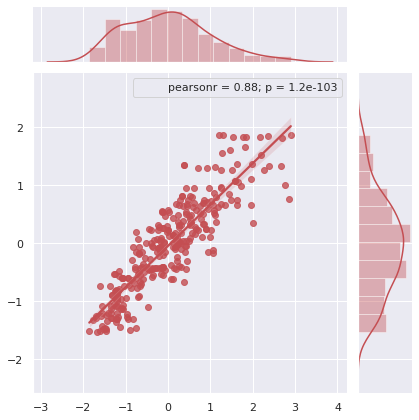

In [122]:
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");

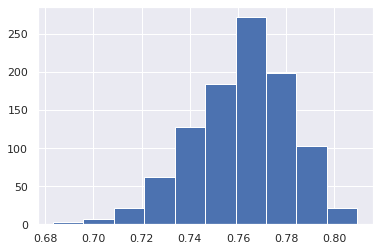

95.0 confidence interval of accuracy 71.8% and 79.6%


In [123]:
values = data.values
# Number of bootstrap samples to create
n_iterations = 1000      
# size of a bootstrap sample
n_size = int(len(data) * 0.7)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators = best_n_estimators, max_features = best_max_features, max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split, bootstrap=best_bootstrap)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval of accuracy %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# 4.10 Random Forest Regressor - k fold

In [0]:
# Divide the dataset into Input features and Target variables
dat = data.copy()
X=dat.drop(['strength'], axis = 1)
Y=dat['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)


[0.64046564 0.63563314 0.6820674  0.7407804  0.59146118 0.6474918
 0.51676557 0.67415622 0.53342991 0.37972142]


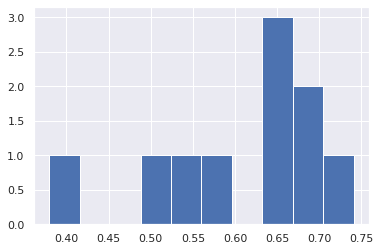

95.0 confidence interval of test accuracy 53.0% and 67.8%
max accuracy: 0.7407803952773968
min accuracy: 0.3797214155753802
Average accuracy:  0.6041972653441977
Standard Deviation:  0.09848600157394828


In [125]:
num_folds = 10
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
rf_best_k = RandomForestRegressor(n_estimators = best_n_estimators, max_features = best_max_features, max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split, bootstrap=best_bootstrap)
rf_best_k.fit(X_train,y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(rf_best_k,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [126]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'R2 accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.11 Ada Boosting

In [127]:
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

random_ada = RandomizedSearchCV(ada,param_distributions = param_dist,cv=3,n_iter = 10,n_jobs=-1)
random_ada.fit(X_train, y_train)

print("Best Score::{}".format(random_ada.best_score_))
# View best hyperparameters
print(random_ada.best_params_)
best_est=random_ada.best_estimator_.get_params()['n_estimators']
best_lr=random_ada.best_estimator_.get_params()['learning_rate']
best_loss=random_ada.best_estimator_.get_params()['loss']

Best Score::0.7680146309744934
{'n_estimators': 100, 'loss': 'square', 'learning_rate': 0.3}


In [128]:
ada = AdaBoostRegressor(n_estimators=best_est, loss=best_loss,learning_rate=best_lr)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
# performance on train data
print('Performance on training data using Ada Boosting:',ada.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Ada Boosting:',ada.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy using Ada Boosting: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'R2 accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

Performance on training data using Ada Boosting: 0.8273309974565306
Performance on testing data using Ada Boosting: 0.7789916345160282
Accuracy using Ada Boosting:  0.7789916345160282
MSE:  0.22100836548397185


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


Observation:
* This model hads a slight difference between performance of train and test; but that can be ignored as of now

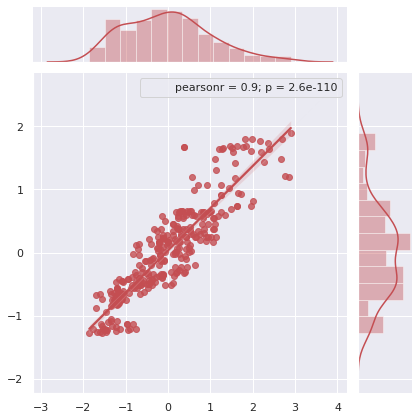

In [129]:
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");

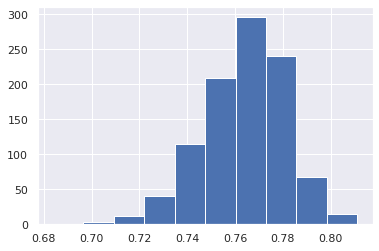

95.0 confidence interval of test accuracy 72.7% and 79.3%


In [130]:
values = data.values
# Number of bootstrap samples to create
n_iterations = 1000      
# size of a bootstrap sample
n_size = int(len(data) * 0.7)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    model = AdaBoostRegressor(n_estimators=best_est, loss=best_loss,learning_rate=best_lr)
    # fit against independent variables and corresponding target values
    model.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = model.score(test[:, :-1] , y_test)
    predictions = model.predict(test[:, :-1])  

    stats.append(score)
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# 4.12 Ada Boosting Regressor and KFold

In [0]:
data_ens = data.copy()
X=data_ens.drop(['strength'], axis = 1)
Y=data_ens['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

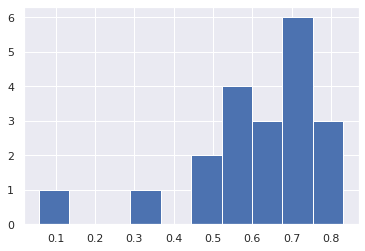

95.0 confidence interval of accracy 51.9% and 68.7%
max accuracy: 0.8317118015629871
min accuracy: 0.05718147511341798
Average accuracy:  0.6031654677530891
Standard Deviation:  0.17504327560228147


In [132]:
num_folds = 20
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
rf_best_k = RandomForestRegressor(n_estimators = best_n_estimators, max_features = best_max_features, max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split, bootstrap=best_bootstrap)
rf_best_k.fit(X_train,y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(rf_best_k,X_test, y_test, cv=kfold)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of accracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [133]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor - k fold'], 'R2 accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.13 **Bagging Regressor**

In [134]:
param_dist = {
 'n_estimators': [10,20,30,40,50,80,100,150,180,200,220,250]
 }
bagging = BaggingRegressor()
bagging.fit(X_train,y_train)

random_bag = GridSearchCV(bagging,param_grid = param_dist,cv=5)
random_bag.fit(X_train, y_train)

print("Best Score::{}".format(random_bag.best_score_))
# View best hyperparameters
print(random_bag.best_params_)
bes = random_bag.best_estimator_.get_params()['n_estimators']

Best Score::0.8858481922513161
{'n_estimators': 220}


In [135]:
bagging = BaggingRegressor(n_estimators=bes)
bagging.fit(X_train,y_train)
y_pred = ada.predict(X_test)
# performance on train data
print('Performance on training data using Ada Boosting:',bagging.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Ada Boosting:',bagging.score(X_test,y_test))
#Evaluate the model using accuracy
acc_b=metrics.r2_score(y_test, y_pred)
print('R2 Accuracy using Boosting Regressor: ',acc_b)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'R2 accuracy': [acc_b]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

Performance on training data using Ada Boosting: 0.9830488071898691
Performance on testing data using Ada Boosting: 0.8734851163109537
R2 Accuracy using Boosting Regressor:  0.7789916345160282
MSE:  0.22100836548397185


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


Observation:
* Bagging Regressor is clearly a overfit model

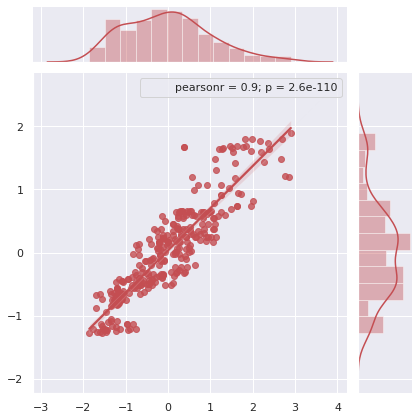

In [136]:
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");

# 4.14 Baggging andK fold CV

[0.93111466 0.54363417 0.73129038 0.85634156 0.7549204  0.72661801
 0.77870147 0.85718826 0.85125982 0.76943758 0.86632033 0.84385261
 0.84160351 0.7818118  0.8549842  0.78734667 0.70566722 0.6666257
 0.71086926 0.86154906]


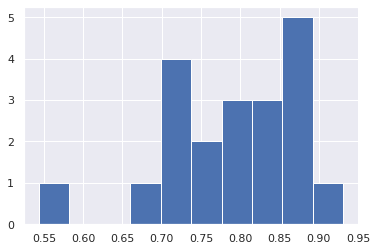

95.0 confidence interval of test accuracy 74.4% and 82.8%
max accuracy: 0.9311146644603023
min accuracy: 0.543634174432734
Average accuracy:  0.7860568331343394
Standard Deviation:  0.08706632583236894


In [137]:
num_folds = 20
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
bagging = BaggingRegressor(n_estimators=bes)
bagging.fit(X_train,y_train)
results1 = cross_val_score(bagging,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [138]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'R2 accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.15 SVR

In [139]:
data_mode = data.copy()
X=data_mode.drop(['strength'], axis = 1)
Y=data_mode['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)
#importing SVR
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 0.5,  1, 10, 100, 1000],  
              'gamma': [1000, 100, 10, 1, 0.5,  0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear']}  
grid = GridSearchCV(SVR(), param_grid, cv=3, verbose = 0) 
# fitting the model for grid search 
best_model=grid.fit(X_train, y_train) 

# View best hyperparameters
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
best_gamma=best_model.best_estimator_.get_params()['gamma']
best_c=best_model.best_estimator_.get_params()['C']
best_kernel=best_model.best_estimator_.get_params()['kernel']
print("Best Score:", best_model.best_score_)

Best gamma: 0.1
Best C: 10
Best kernel: rbf
Best Score: 0.8873108483132547


Performance on training data using SVR: 0.9627702965046067
Performance on testing data using SVR: 0.9055743791022668
Accuracy SVR:  0.9055743791022669
MSE:  0.09442562089773307


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


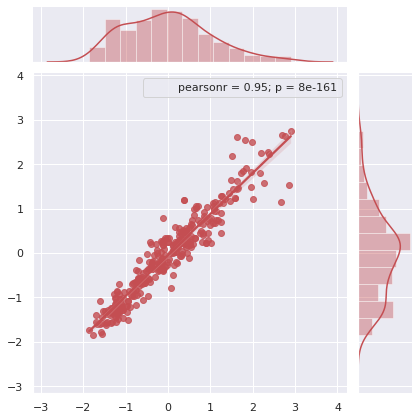

In [140]:
svm_best=SVR(C=best_c,gamma=best_gamma,kernel=best_kernel)
svm_best.fit(X_train,y_train)
y_pred = svm_best.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',svm_best.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',svm_best.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");
    
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'R2 accuracy': [acc_S]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

Observation:
* Support vector Regressor is an overfit model but it gave very good results in test data upto noW

# 4.16 SVR with kfold

[0.87676005 0.8433888  0.87065771 0.85965608 0.7347083  0.68850123
 0.63821927 0.84312654 0.93012068 0.83147859 0.9294243  0.77369465
 0.7330338  0.81056439 0.90863669 0.75446833 0.72358912 0.65020369
 0.84404881 0.9304652 ]


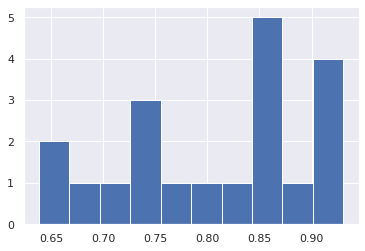

95.0 confidence interval of test accuracy 76.6% and 85.2%
max accuracy: 0.9304652021319574
min accuracy: 0.6382192712047503
Average accuracy:  0.8087373106561209
Standard Deviation:  0.0896108822798956


In [141]:
num_folds = 20
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
svm_best=SVR(C=best_c,gamma=best_gamma,kernel=best_kernel)
svm_best.fit(X_train,y_train)
results1 = cross_val_score(svm_best,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [142]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor K fold'], 'R2 accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.17 Ensemeble KNN Regressor, SVR, LR

In [0]:
data_ens = data.copy()
X=data_ens.drop(['strength'], axis = 1)
Y=data_ens['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [144]:
#Multiple model Ensemble
from sklearn import svm
from sklearn.ensemble import VotingRegressor
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'R2 accuracy': [acc_E]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

Performance on training data using ensemble: 0.8925949615169776
Performance on testing data using ensemble: 0.8539906308999298
Accuracy ensemble:  0.8539906308999299
MSE:  0.1460093691000701


,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


Observation:
* Ensemble model is the best model for production because it is not a overfit and it performs reasonalbly well in test data

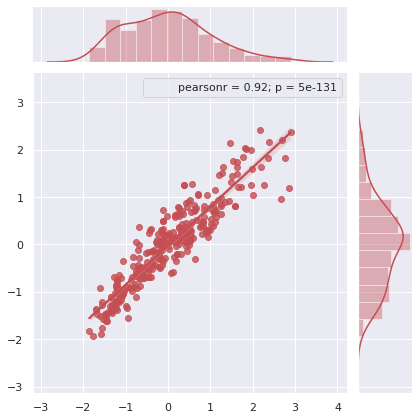

In [145]:
#plot y_test and y_pred using pearsonr function and jointplot
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style():
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="r");
    

# 4.18 Ensemeble KNN Regressor, SVR, LR with K fold

In [0]:
data_ens = data.copy()
X=data_ens.drop(['strength'], axis = 1)
Y=data_ens['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

[0.83998687 0.52869349 0.88399941 0.83406576 0.72669362 0.8205309
 0.80605169 0.83986731 0.88439036 0.7853158  0.89895389 0.69914245
 0.79899059 0.81733222 0.88308937 0.787755   0.78344721 0.81492713
 0.64359029 0.7913219 ]


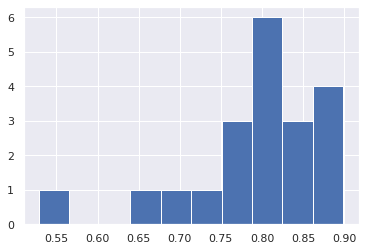

95.0 confidence interval of test accuracy 75.2% and 83.5%
max accuracy: 0.8989538930900446
min accuracy: 0.5286934884111089
Average accuracy:  0.7934072640048523
Standard Deviation:  0.08650648580146365


In [147]:
num_folds = 20
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)
results1 = cross_val_score(evc,X_test, y_test, cv=kfold)
print(results1)
# plot scores
pyplot.hist(results1)
pyplot.show()
mean, lower, upper = mean_confidence_interval(results1,confidence = 0.95)
print('%.1f confidence interval of test accuracy %.1f%% and %.1f%%' % (0.95*100, lower*100, upper*100))

print("max accuracy:", results1.max())
print("min accuracy:", results1.min())
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [148]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble - k fold'], 'R2 accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.19 Linear Regression

In [0]:
abc = data.copy()
X=abc.drop(['strength'], axis = 1)
Y=abc['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [151]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Score: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))
acc = r2_score(y_test,y_pred_lrte)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lrtr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lrte))
print('Train RMSE : ',rmse_train)
print('Test RMSE : ',rmse_test)

Score:  0.8225486032150664
Train R2 score:  0.8225486032150664
Test R2 score:  0.7942570024725457
Train RMSE :  0.42124980330551326
Test RMSE :  0.453589018305618


Observation:
* For the given features, Linear Regression performs good and not a overfit model

In [152]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Linear Regression'], 'R2 accuracy': [acc]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.20 Lasso Regression

In [0]:
abc_las = data.copy()
X=abc_las.drop(['strength'], axis = 1)
Y=abc_las['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [154]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5,  1, 10, 100, 1000]}  
from sklearn import linear_model
model=linear_model.Lasso(alpha=0.1)
model.fit(X_train,y_train)

grid = GridSearchCV(model, param_grid, cv=3, verbose = 0) 
# fitting the model for grid search 
best_model=grid.fit(X_train, y_train) 

# View best hyperparameters
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
best_alpha=best_model.best_estimator_.get_params()['alpha']
print("Best Score:", best_model.best_score_)

Best alpha: 0.001
Best Score: 0.8121906150011117


In [155]:
model=linear_model.Lasso(alpha=best_alpha)
model.fit(X_train,y_train)
print('Score: ',model.score(X_train,y_train))
y_pred_lrtr=model.predict(X_train)
y_pred_lrte=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))
acc = r2_score(y_test,y_pred_lrte)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lrtr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lrte))
print('Train RMSE : ',rmse_train)
print('Test RMSE : ',rmse_test)

Score:  0.8224278762180227
Train R2 score:  0.8224278762180226
Test R2 score:  0.7940051807297137
Train RMSE :  0.42139307514715696
Test RMSE :  0.45386652142484174


In [156]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression'], 'R2 accuracy': [acc]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.21 Ridge Regression

In [0]:
abc_rid = data.copy()
X=abc_rid.drop(['strength'], axis = 1)
Y=abc_rid['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [158]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5,  1, 10, 100, 1000]}  
from sklearn.linear_model import Ridge
model=Ridge()
grid = GridSearchCV(model, param_grid, cv=3, verbose = 0) 
# fitting the model for grid search 
best_model=grid.fit(X_train, y_train) 

# View best hyperparameters
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
best_alpha=best_model.best_estimator_.get_params()['alpha']
print("Best Score:", best_model.best_score_)


Best alpha: 0.001
Best Score: 0.8124006079859942


In [159]:
model=Ridge(alpha=best_alpha)
model.fit(X_train,y_train)
print('Score: ',model.score(X_train,y_train))
y_pred_lrtr=model.predict(X_train)
y_pred_lrte=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))
acc_rid = r2_score(y_test,y_pred_lrte)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lrtr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lrte))
print('Train RMSE : ',rmse_train)
print('Test RMSE : ',rmse_test)

Score:  0.8225486031656108
Train R2 score:  0.8225486031656108
Test R2 score:  0.7942570568098379
Train RMSE :  0.4212498033642143
Test RMSE :  0.4535889584085597


In [160]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression'], 'R2 accuracy': [acc_rid]},index={'21'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# 4.22 ElasticNet Regression

In [0]:
abc_el = data.copy()
X=abc_el.drop(['strength'], axis = 1)
Y=abc_el['strength']
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42, test_size=0.3 )
X_train = zscore(X_train)
X_test = zscore(X_test)
y_train = zscore(y_train)
y_test = zscore(y_test)

In [162]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5,  1, 10, 100, 1000]}  
from sklearn.linear_model import ElasticNet
model=ElasticNet()
grid = GridSearchCV(model, param_grid, cv=5, verbose = 0) 
# fitting the model for grid search 
best_model=grid.fit(X_train, y_train) 

# View best hyperparameters
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
best_alpha=best_model.best_estimator_.get_params()['alpha']
print("Best Score:", best_model.best_score_)


Best alpha: 0.001
Best Score: 0.8132833055358413


In [163]:
model=ElasticNet(alpha=best_alpha)
model.fit(X_train,y_train)
print('Score: ',model.score(X_train,y_train))
y_pred_lrtr=model.predict(X_train)
y_pred_lrte=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))
acc_els = r2_score(y_test,y_pred_lrte)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lrtr))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_lrte))
print('Train RMSE : ',rmse_train)
print('Test RMSE : ',rmse_test)

Score:  0.8224867748792563
Train R2 score:  0.8224867748792563
Test R2 score:  0.7941508954213432
Train RMSE :  0.4213231836971992
Test RMSE :  0.4537059670961544


In [164]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['ElasticNet Regression'], 'R2 accuracy': [acc_els]},index={'22'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'R2 accuracy']]
results

,Method,R2 accuracy
1,Decision Tree,0.695821
2,Decision Tree k fold,0.596068
3,Decision Tree with top 4 features,0.695821
4,Decision Tree top 4 - k fold,0.547386
5,Pruned Decision Tree,0.639703
6,Pruned Decision Tree k fold,0.577163
7,Pruned Decision Tree with top 5 features,0.639703
8,Pruned Decision Tree k fold and top 5 features,0.584997
9,Random Forest Regressor,0.773934
10,Random Forest Regressor k fold,0.604197


# Note

Lasso, Ridge, ElasticNet Regression performs almost same as Linear Regression because linear regression tend not to overfit.If Linear Regression was overfitting, any of the lasso, ridge would help in reducing overfititing

# Conclusions

In [165]:
from tabulate import tabulate
print(tabulate(results, headers='keys', tablefmt='psql'))

+----+------------------------------------------------+---------------+
|    | Method                                         |   R2 accuracy |
|----+------------------------------------------------+---------------|
|  1 | Decision Tree                                  |      0.695821 |
|  2 | Decision Tree k fold                           |      0.596068 |
|  3 | Decision Tree with top 4 features              |      0.695821 |
|  4 | Decision Tree top 4 - k fold                   |      0.547386 |
|  5 | Pruned Decision Tree                           |      0.639703 |
|  6 | Pruned Decision Tree k fold                    |      0.577163 |
|  7 | Pruned Decision Tree with top 5 features       |      0.639703 |
|  8 | Pruned Decision Tree k fold and top 5 features |      0.584997 |
|  9 | Random Forest Regressor                        |      0.773934 |
| 10 | Random Forest Regressor k fold                 |      0.604197 |
| 11 | Ada Boosting Regressor                         |      0.7

In [0]:
Conclusions:
* If time required to get the output is not a big deal in production, I would go with Support Vector Regressor even though there is an overift
* If time required to get the output is a big deal in production, I would go with ensemble model